<a href="https://colab.research.google.com/github/rtajeong/M3_new_2025/blob/main/lab45_opencv_digits_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손글씨 숫자 인식
- 8x8 픽셀 숫자 데이터 5620개 사용

In [41]:
import cv2
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
digits = datasets.load_digits()   # 8x8 pixels

In [42]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [43]:
digits.data.shape, digits.images.shape

((1797, 64), (1797, 8, 8))

In [44]:
digits.target, digits.target_names

(array([0, 1, 2, ..., 8, 9, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [45]:
digits.data[0], digits.images[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]))

In [46]:
digits.target[0]

np.int64(0)

In [47]:
digits.data[0].shape, digits.images[0].shape, digits.target[0], digits.target_names[0]

((64,), (8, 8), np.int64(0), np.int64(0))

In [48]:
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)
print(digits.target_names.shape)

(1797, 64)
(1797, 8, 8)
(1797,)
(10,)


In [49]:
digits.data[9]

array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
       13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
       16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
        9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.])

In [50]:
digits.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

np.int64(0)

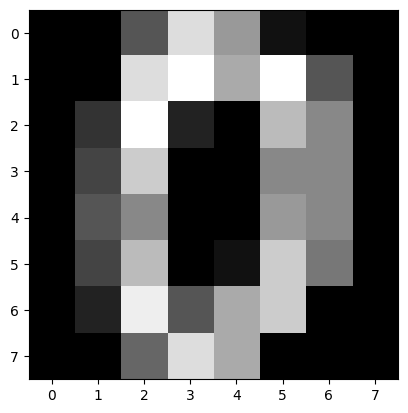

In [51]:
plt.imshow(digits.images[0], cmap='gray')
digits.target[0]

In [52]:
digits.data.max(), digits.data.min()

(np.float64(16.0), np.float64(0.0))

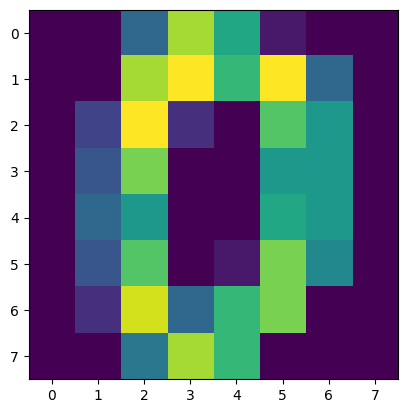

In [53]:
plt.imshow(digits.images[0])

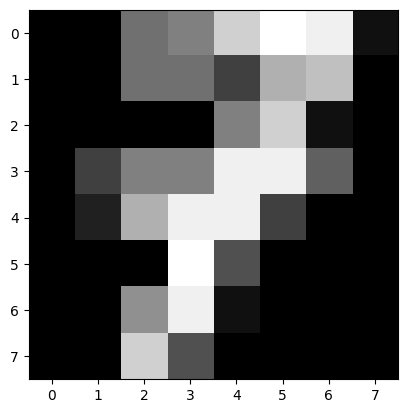

np.int64(7)

In [54]:
plt.imshow(digits.images[7], cmap="gray")
plt.show()
digits.target[7]

In [55]:
# 각 픽셀은 0~15의 숫자로 표현된다, 크면 밝은 색 ( 0 ~ 16 )
print(digits.images[7])

[[ 0.  0.  7.  8. 13. 16. 15.  1.]
 [ 0.  0.  7.  7.  4. 11. 12.  0.]
 [ 0.  0.  0.  0.  8. 13.  1.  0.]
 [ 0.  4.  8.  8. 15. 15.  6.  0.]
 [ 0.  2. 11. 15. 15.  4.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  9. 15.  1.  0.  0.  0.]
 [ 0.  0. 13.  5.  0.  0.  0.  0.]]


In [56]:
digits.target[:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

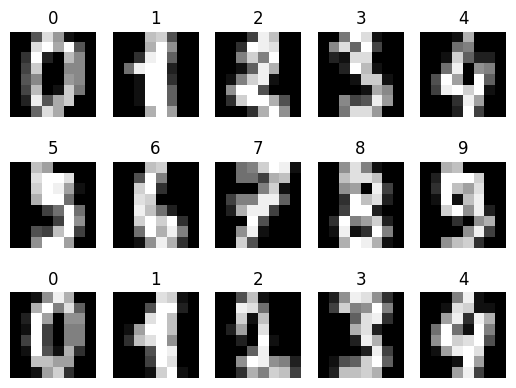

In [57]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

In [58]:
x = digits.images
x = x.reshape((-1, 64))    # same data as digits.data
x[0] == digits.data[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [59]:
x.shape, digits.data.shape

((1797, 64), (1797, 64))

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score
import numpy as np

# np.random.seed(42)
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

clf = svm.SVC(max_iter=2000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(clf.score(x_test, y_test))

0.9866666666666667
0.9866666666666667


### Persistance:
- joblib.dump() and joblib.load() provide a replacement for pickle to work efficiently on arbitrary Python objects containing large data, in particular large numpy arrays.
- 학습한 모델 파라미터를 피클 형식으로 저장한다. 피클처럼 오래 저장한다는 의미.

In [61]:
# 학습한 데이터 (object) 저장하기
import joblib
joblib.dump(clf, 'digits.pkl')

['digits.pkl']

In [62]:
def predict_digit(filename):
    model = joblib.load("digits.pkl")  # 학습한 모델 읽어 들이기

    my_img = cv2.imread(filename)
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()

    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()

    my_img = cv2.resize(my_img, (8, 8))
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()

    # my_img = 15 - my_img // 16      # // is floor division (7//2=3, -7//2=-4)
    my_img = 15 - (my_img // 16)
    # 흑백 반전
    plt.imshow(my_img, cmap="gray")
    plt.show()

    my_img = my_img.reshape((-1, 64))
    res = model.predict(my_img)
    return res[0]

In [63]:
# !dir *.png

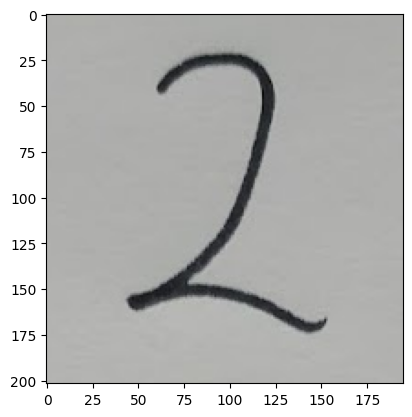

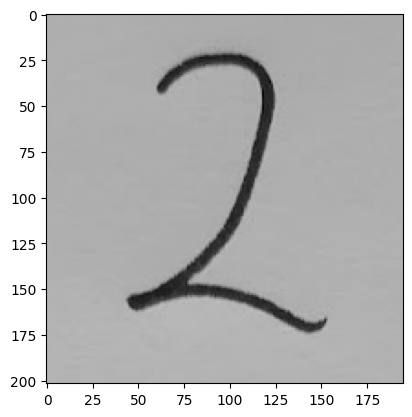

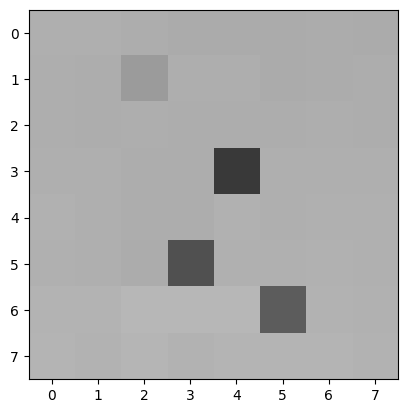

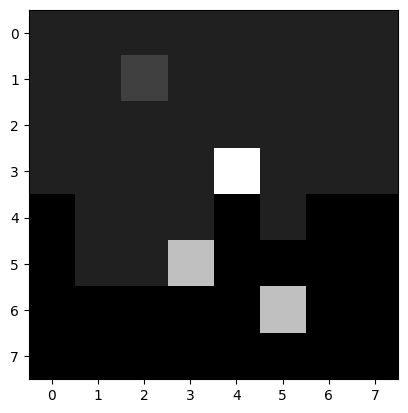

estimated number = 8


In [64]:
# 이미지 파일을 지정해서 실행하기
# 미리보기에서 클립보드에서 파일로 저장 실행
# 이미지 그리기도 미리보기에서 가능함
# img = cv2.imread("num_2_color.png")
n = predict_digit("digit2.png")
print("estimated number = " + str(n))

# Exercise

In [65]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [66]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [67]:
x_train, y_train = train_images[:2000], train_labels[:2000]
x_test, y_test = test_images[:1000], test_labels[:1000]

In [68]:
x_train = x_train.reshape(2000, 28*28)
x_test = x_test.reshape(1000, 28*28)

In [69]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2000, 784), (2000,), (1000, 784), (1000,))

In [70]:
from sklearn import svm
from sklearn.metrics import accuracy_score
clf = svm.SVC(max_iter=2000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(clf.score(x_test, y_test))

0.905
0.905


In [71]:
def predict_digit2(model, filename):

    my_img = cv2.imread(filename)
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()

    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()

    my_img = cv2.resize(my_img, (28, 28))
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()

    # my_img = 15 - my_img // 16      # // is floor division (7//2=3, -7//2=-4)
    my_img = 255 - my_img
    # 흑백 반전
    plt.imshow(my_img, cmap="gray")
    plt.show()

    my_img = my_img.reshape((-1, 28*28))
    res = model.predict(my_img)
    return res[0]

In [72]:
!curl -L https://lh5.googleusercontent.com/akPIqDHLBBv01KyUKh5pGgSK8v1NuF51wB1h2FPj0CXbnnCyDvcznUVBVyb9x2dhHfH_x2Jzf_v_wVUn3vbXhs__3cTKJRSlu_RvlZN5rVCiYXlrX4qTjmV0tGq-unW8OF82uNz2 --output digit9.png
!curl -L https://lh6.googleusercontent.com/Llcq3vz4YjrJaDInz4dXK8fj1WK6mHTI0LPt_teD7q5EsVGM3eXr_raboptWUDfqfvDs-CGAvb-9PfDauFHM26R45HlVDfJCKkpCBwD-DUHGv6hwphK8WaBSVT-BdV3apouqzeW8 --output digit2.png
!curl -L https://lh4.googleusercontent.com/UUTHLTeBlKCwXjhZ9CLyI-7KXc0P1OSviCzKWHfKr5fDt8s44mfUZWhAWAd34eRcNyfk2OYZL8ySsJJgqSqNyWzMZS6fLC4K_8d1BZ9SsK5OkEpGDw4ubvKxfC85ZLMqREMoOpCp --output digit5.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24652  100 24652    0     0  56304      0 --:--:-- --:--:-- --:--:-- 56283
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19124  100 19124    0     0   200k      0 --:--:-- --:--:-- --:--:--  200k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24206  100 24206    0     0   281k      0 --:--:-- --:--:-- --:--:--  284k


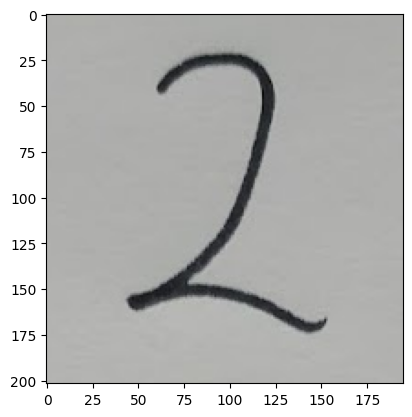

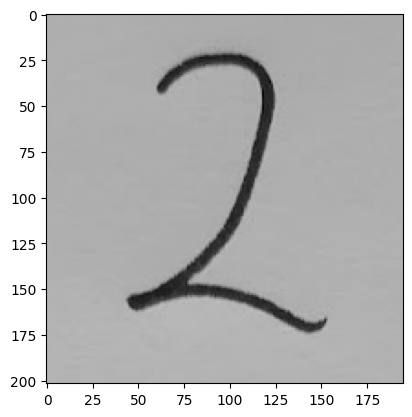

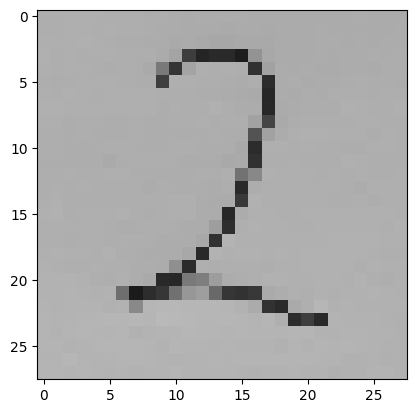

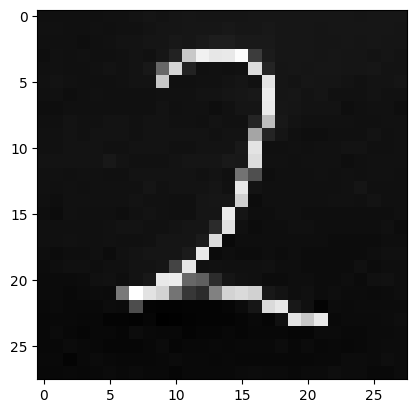

estimated number = 2


In [73]:
n = predict_digit2(clf, "digit2.png")
print("estimated number = " + str(n))

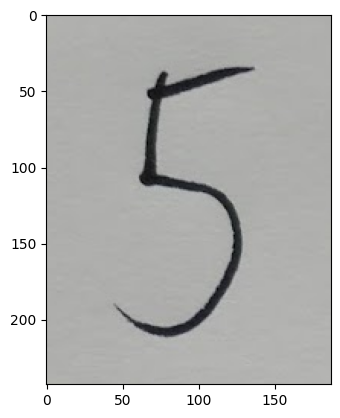

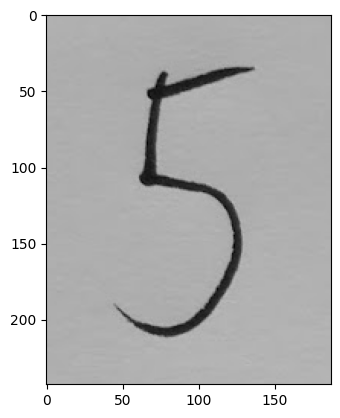

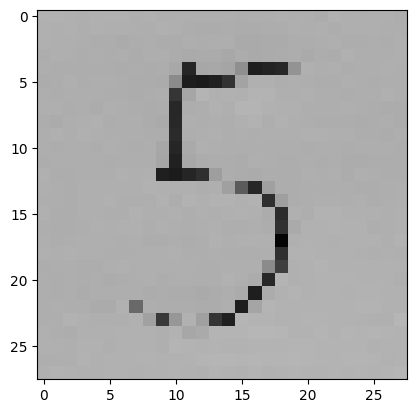

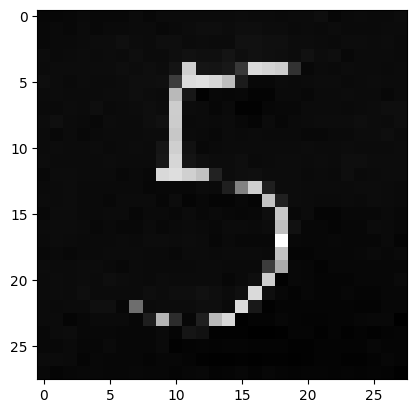

estimated number = 5


In [74]:
n = predict_digit2(clf, "digit5.png")
print("estimated number = " + str(n))

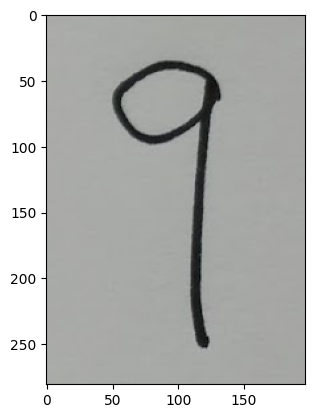

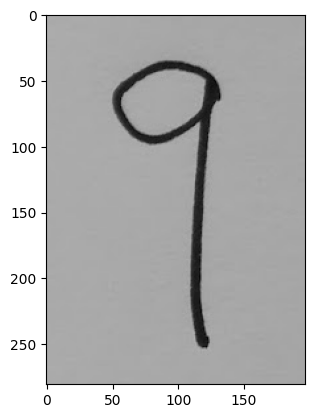

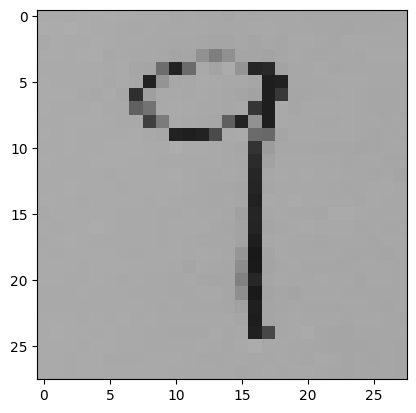

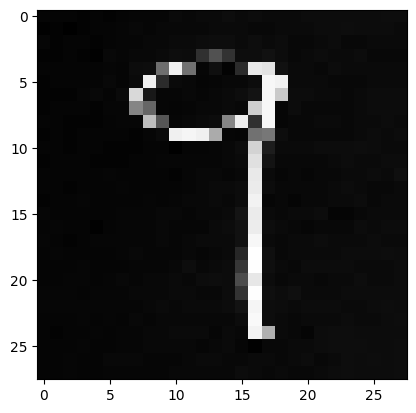

estimated number = 2


In [75]:
n = predict_digit2(clf, "digit9.png")
print("estimated number = " + str(n))